<a href="https://colab.research.google.com/github/M4mbo/Generative_Adversarial_Network_on_Simpsons_Faces/blob/main/DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from tqdm import tqdm
import imageio as iio
from torchvision.utils import make_grid
from mpl_toolkits.axes_grid1 import ImageGrid
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.utils as vutils
from torch.utils.tensorboard import SummaryWriter
from IPython.display import display, Image

In [ ]:
!wget https://www.dropbox.com/s/g0w7a3x1aw3oonf/SimpsonFaces.zip?dl=0

!unzip -o SimpsonFaces.zip?dl=0 -d extracted_data -x '__MACOSX/*'

!ls

Streaming output truncated to the last 5000 lines.
  inflating: extracted_data/cropped/9556.png  
  inflating: extracted_data/cropped/8884.png  
  inflating: extracted_data/cropped/6671.png  
  inflating: extracted_data/cropped/9542.png  
  inflating: extracted_data/cropped/5378.png  
  inflating: extracted_data/cropped/2417.png  
  inflating: extracted_data/cropped/3709.png  
  inflating: extracted_data/cropped/4066.png  
  inflating: extracted_data/cropped/4700.png  
  inflating: extracted_data/cropped/2371.png  
  inflating: extracted_data/cropped/6117.png  
  inflating: extracted_data/cropped/9224.png  
  inflating: extracted_data/cropped/1678.png  
  inflating: extracted_data/cropped/7209.png  
  inflating: extracted_data/cropped/4728.png  
  inflating: extracted_data/cropped/3047.png  
  inflating: extracted_data/cropped/2359.png  
  inflating: extracted_data/cropped/5436.png  
  inflating: extracted_data/cropped/1650.png  
  inflating: extracted_data/cropped/1888.png  
  inflati

In [ ]:
class MyDataset(Dataset):
  def __init__(self, image_path, transform):
    self.image_path = image_path
    self.images = os.listdir(image_path)
    self.transform = transform
    self._check_images()

  def _check_images(self):
    valid_images = []
    for img_name in self.images:
      img_path = os.path.join(self.image_path, img_name)
      try:
        # Try to open the image to check if it is valid
        iio.imread(img_path)
        valid_images.append(img_name)
      except Exception as e:

        print(f"Error loading image {img_path}: {e}. Skipping...")
        os.remove(img_path)

    self.images = valid_images

  def __len__(self):
    return len(self.images)

  def __getitem__(self,idx):
    im_path = os.path.join(self.image_path, self.images[idx])
    im = iio.imread(im_path)
    im = self.transform(im)
    return im

In [ ]:
trans = transforms.Compose([transforms.ToPILImage(),
                            transforms.Resize([128,128]),
                            transforms.RandomRotation(5),
                            transforms.RandomHorizontalFlip(0.1),
                            transforms.ToTensor()])
batch_size = 32

dataset = MyDataset("extracted_data/cropped/", trans)

# We only need a train_loader for this model
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


<ipython-input-3-561c36c499fd>:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  iio.imread(img_path)


In [ ]:
def visualize_dataset(dataloader):
  images = next(iter(dataloader))
  plt.figure(figsize=(15,15))
  for i in range(32):
    plt.subplot(8,8,i+1)
    img = np.transpose(images[i].numpy(), (1, 2, 0))  # Transpose the image dimensions
    plt.imshow(img)
    plt.axis("off")

<ipython-input-3-561c36c499fd>:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = iio.imread(im_path)


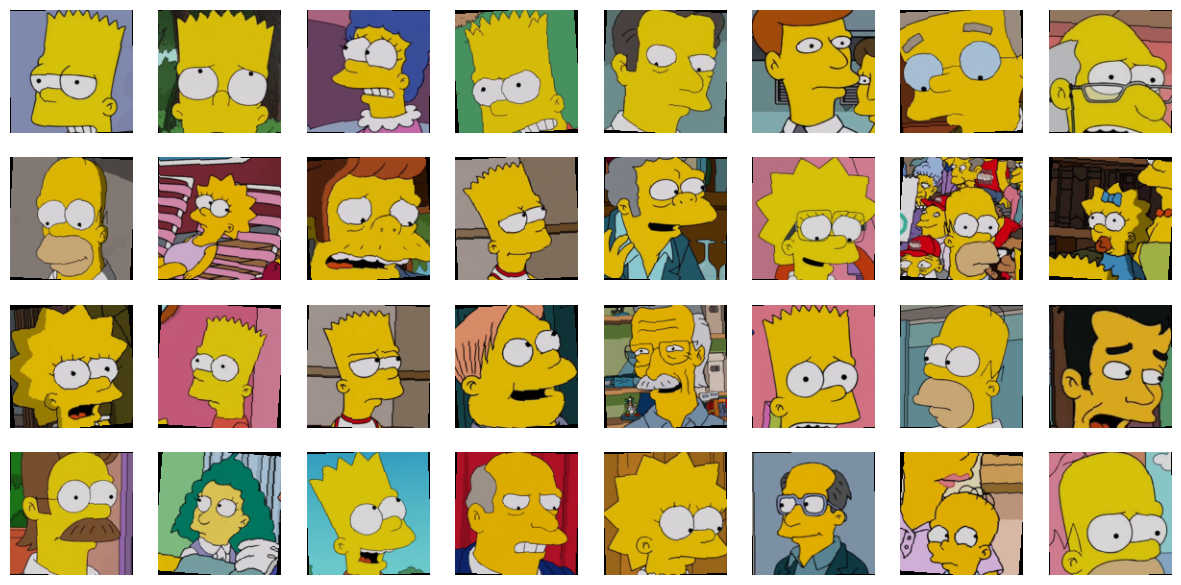

In [ ]:
visualize_dataset(train_loader)